The research paper I'm looking at is "Host-microbial interactions in Idiopathic Pulmonary Fibrosis" (https://pubmed.ncbi.nlm.nih.gov/28085486/). This study looks at interactions between the host genome that is associated with the internal human environment and the gene expression of those genes. IPF is a rare disease without a known cause, and it results in scarring of the lung tissue, and is often diagnosed in elderly patients. It's possible there is some genetic or host-microbial interaction to how IPF develops.

In [13]:
import pandas as pd
genes = pd.read_table("GSE93606.tsv").set_index('Gene').transpose()
genes_meta = pd.read_table("metadata_GSE93606.tsv", index_col = 0)

# Two dataframes were included in the research paper, the metadata and the experimental data. The genes dataframe was
# read in using read_table because it is a tsv file, and the index was set. Genes has the genes as the rows and the
# observations in the columns, so I transposed it for consistency

In [14]:
genes.shape
# This dataframe has 173 observations, which is 60 individuals at 1 month, 3 months, and a year if alive
# The 21661 features are the genes of interest and their expression

(173, 21661)

In [15]:
genes_meta.shape
# The metadata has the same amount of observations, but instead of genes, the features are baseline data

(173, 59)

In [17]:
# Features ENSG00000000003 and ENSG00000000457, I expect a count of 173, and a mean of close to 0, with a
# standard deviation around 0.05.
genes['ENSG00000000457'].describe()

count    173.000000
mean       2.440762
std        0.357043
min        1.478928
25%        2.211143
50%        2.397322
75%        2.652993
max        3.506654
Name: ENSG00000000457, dtype: float64

In [18]:
genes['ENSG00000000003'].describe()

count    173.000000
mean      -0.034303
std        0.128535
min       -0.261316
25%       -0.114579
50%       -0.058766
75%        0.040097
max        0.398943
Name: ENSG00000000003, dtype: float64

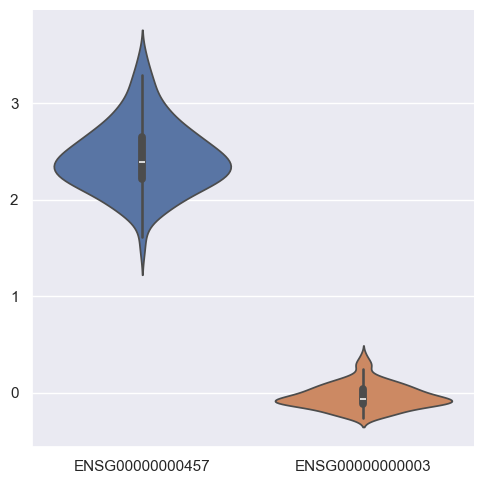

In [29]:
import seaborn as sns
sns.set_theme()
genes2 = pd.concat([genes['ENSG00000000457'], genes['ENSG00000000003']], axis = 1)

sns.catplot(data = genes2, kind = 'violin')

# I want to make a categorical plot comparing distribution and averages for two genes and their expression
# This code requires using concat to create a dataframe with just the two genes of interest, which I looked at earilier with describe, then a catplot as violin
# This visualization shows that ENSG00000000457 has a much higher gene expression than ENSG00000000003, suggesting that it might be linked to IPF symptoms or diagnosis, since this paper looks at host-microbial interactions,
# this gene might be known to have an impact on a microbe in the human body, and it being at an elevated level suggests that this microbe may contribute to IPF symptoms developing, which could give insight to the researcher

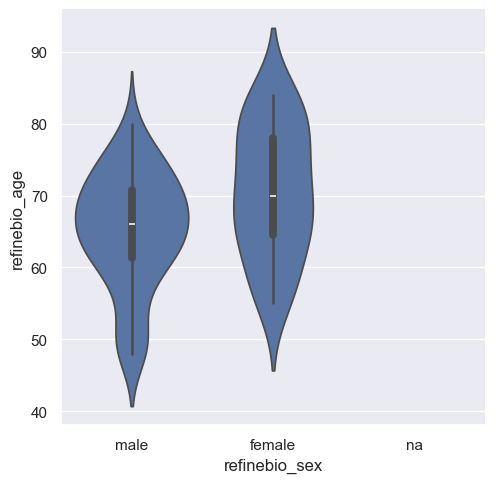

In [30]:
sns.catplot(data = genes_meta, x = 'refinebio_sex', y = 'refinebio_age', kind = 'violin')

# This catplot compares age and sex for the research metadata
# This was made using sns.catplot and setting x as sex, and y as age as named in the datafrane. Kind is set to violin.
# This visualization also contributes to the hypothesis as it suggests that in this study females were on average older, perhaps suggesting that sex might contribute to IPF disease progression
# or host-microbial interaction. Additionally, since women have an average lifespan longer than men, it might suggest that IPF occurs less often in younger women, but an overall even distribution after that.